In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
Content_df=pd.read_csv("dataset/Content.csv")
Reactions_df=pd.read_csv("dataset/Reactions.csv")
ReactionTypes_df=pd.read_csv("dataset/ReactionTypes.csv")
Content_df.head()




,Unnamed: 0,Content ID,Unnamed: 2,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,NaN,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,NaN,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,NaN,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,NaN,video,food


In [17]:
Content_df.isnull().sum()

Unnamed: 0       0
Content ID       0
Unnamed: 2    1000
Type             0
Category         0
dtype: int64

In [21]:
Reactions_df.head()

,Unnamed: 0,Content ID,Unnamed: 2,Reaction Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,22-04-2021 15:17
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,07-11-2020 09:43
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,dislike,17-06-2021 12:22
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,scared,18-04-2021 05:13
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,06-01-2021 19:13


In [23]:
Content_df.isnull().sum()

Unnamed: 0       0
Content ID       0
Unnamed: 2    1000
Type             0
Category         0
dtype: int64

In [25]:
ReactionTypes_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [29]:
ReactionTypes_df.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [49]:
# Step 1: Clean the data
# Remove rows with missing values in critical columns
Reactions_df = Reactions_df.dropna(subset=[ 'Content ID', 'Reaction Type','Datetime'])
Content_df = Content_df.dropna(subset=['Content ID', 'Category'])
ReactionTypes_df = ReactionTypes_df.dropna(subset=['Type', 'Sentiment', 'Score'])
Reactions_df.head()



,Unnamed: 0,Content ID,Unnamed: 2,Reaction Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2020-07-11 09:43:00
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2021-06-01 19:13:00
6,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2020-07-12 06:27:00
7,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,cherish,2021-11-04 17:35:00
9,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2021-01-04 22:54:00


In [51]:
Content_df.head()



,Unnamed: 0,Content ID,Unnamed: 2,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,NaN,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,NaN,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,NaN,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,NaN,video,food


In [53]:
ReactionTypes_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [57]:
# Convert 'Datetime' column in Reaction table to datetime format
Reactions_df['Datetime'] = pd.to_datetime(Reactions_df['Datetime'], errors='coerce')
Reactions_df

,Unnamed: 0,Content ID,Unnamed: 2,Reaction Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2020-07-11 09:43:00
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2021-06-01 19:13:00
6,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2020-07-12 06:27:00
7,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,cherish,2021-11-04 17:35:00
9,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2021-01-04 22:54:00
...,...,...,...,...,...
25544,25545,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,like,2021-07-06 03:55:00
25545,25546,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,intrigued,2021-09-04 08:05:00
25549,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-12-09 03:54:00
25550,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,worried,2020-04-11 20:08:00


In [65]:
# Convert 'Score' in ReactionTypes table to numeric (if needed)
ReactionTypes_df['Score'] = pd.to_numeric(ReactionTypes_df['Score'], errors='coerce')
ReactionTypes_df

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [91]:
# Step 2: Merge the data sets

# Merge the Reaction table with the Content table based on 'Content ID'
merged_df = pd.merge(Reactions_df, Content_df[['Content ID', 'Category']], on='Content ID', how='left')

In [93]:
merged_df

,Unnamed: 0,Content ID,Unnamed: 2,Type,Datetime,Category
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2020-07-11 09:43:00,Studying
1,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2021-06-01 19:13:00,Studying
2,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2020-07-12 06:27:00,Studying
3,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,cherish,2021-11-04 17:35:00,Studying
4,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2021-01-04 22:54:00,Studying
...,...,...,...,...,...,...
9681,25545,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,like,2021-07-06 03:55:00,technology
9682,25546,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,intrigued,2021-09-04 08:05:00,technology
9683,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-12-09 03:54:00,technology
9684,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,worried,2020-04-11 20:08:00,technology


In [95]:
Reactions_df = Reactions_df.rename(columns={'Reaction Type': 'Type'})

In [97]:
Reactions_df.head()

,Unnamed: 0,Content ID,Unnamed: 2,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2020-07-11 09:43:00
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2021-06-01 19:13:00
6,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2020-07-12 06:27:00
7,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,cherish,2021-11-04 17:35:00
9,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2021-01-04 22:54:00


In [99]:
ReactionTypes_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [101]:
Content_df.head()

,Unnamed: 0,Content ID,Unnamed: 2,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,NaN,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,NaN,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,NaN,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,NaN,video,food


In [103]:
# Merge the resulting data with the ReactionTypes table based on 'Type'
final_df = pd.merge(merged_df, ReactionTypes_df[['Type', 'Sentiment', 'Score']], on='Type', how='left')

In [105]:
final_df

,Unnamed: 0,Content ID,Unnamed: 2,Type,Datetime,Category,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2020-07-11 09:43:00,Studying,negative,0
1,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,disgust,2021-06-01 19:13:00,Studying,negative,0
2,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2020-07-12 06:27:00,Studying,neutral,35
3,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,cherish,2021-11-04 17:35:00,Studying,positive,70
4,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,peeking,2021-01-04 22:54:00,Studying,neutral,35
...,...,...,...,...,...,...,...,...
9681,25545,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,like,2021-07-06 03:55:00,technology,positive,50
9682,25546,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,intrigued,2021-09-04 08:05:00,technology,positive,45
9683,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-12-09 03:54:00,technology,positive,30
9684,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,worried,2020-04-11 20:08:00,technology,negative,12


In [107]:
#Step 3: Calculate the top 5 performing categories

# Group by 'Category' and sum the 'Score' for each category
category_performance = final_df.groupby('Category')['Score'].sum().reset_index()

In [109]:
category_performance

,Category,Score
0,Animals,1049
1,Culture,552
2,Education,881
3,Fitness,2032
4,Food,1595
5,Healthy Eating,200
6,Public Speaking,267
7,Science,1778
8,Soccer,1037
9,Studying,606


In [111]:
# Sort by 'Score' in descending order to find the top 5 categories
top_5_categories = category_performance.sort_values(by='Score', ascending=False).head(5)

In [113]:
top_5_categories

,Category,Score
12,animals,28354
19,healthy eating,27450
24,technology,26456
21,science,26324
13,cooking,25967


In [115]:
top_5_categories.to_csv('top_5_categories.csv', index=False)

In [117]:
final_df.to_csv('final_cleaned_dataset.csv', index=False)

In [119]:
#Step 4: Save both the cleaned dataset and top 5 categories to one Excel file
with pd.ExcelWriter('final_results.xlsx') as writer:
    final_df.to_excel(writer, sheet_name='Cleaned Data', index=False)
    top_5_categories.to_excel(writer, sheet_name='Top 5 Categories', index=False)

C:\Users\shruti sahrawat\AppData\Local\Temp\ipykernel_5796\1001393965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


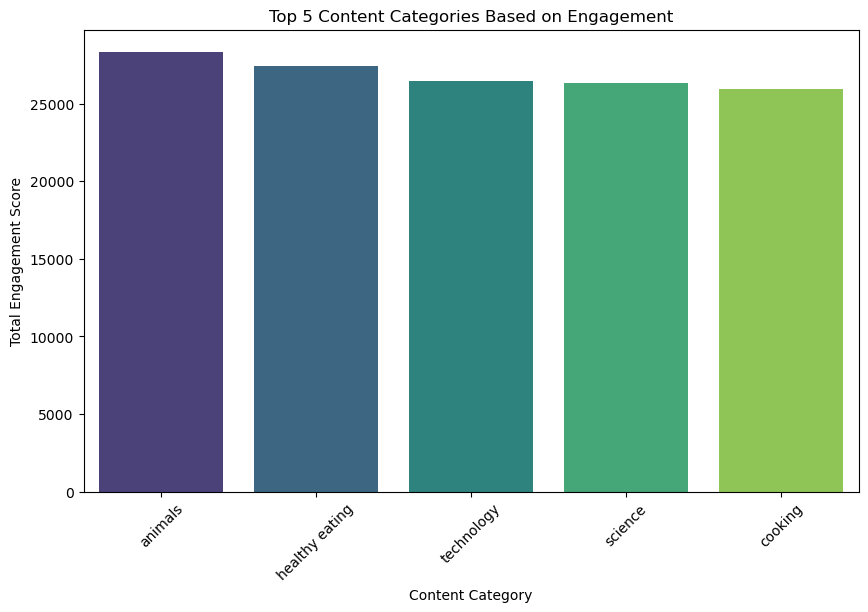

In [135]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 5 Content Categories Based on Engagement')
plt.xlabel('Content Category')
plt.ylabel('Total Engagement Score')
plt.xticks(rotation=45)
plt.show()

In [139]:
#2. Unique Categories (Number of unique categories)
unique_categories = final_df['Category'].nunique()
print(f"Number of unique categories: {unique_categories}")

Number of unique categories: 28


In [145]:
# 3. Reactions to the Most Popular Category (Bar chart)
most_popular_category = top_categories.index[0]
most_popular_reactions = final_df[final_df['Category'] == most_popular_category]['Type'].value_counts()


C:\Users\shruti sahrawat\AppData\Local\Temp\ipykernel_5796\2159538693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_popular_reactions.index, y=most_popular_reactions.values, palette='coolwarm')


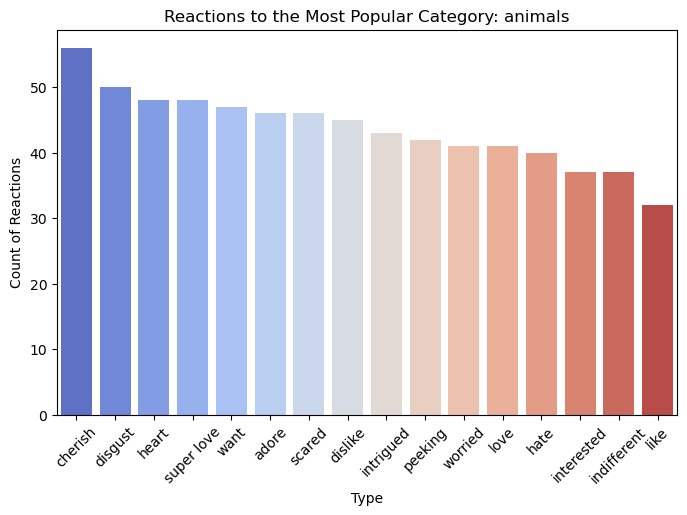

In [147]:
# Plotting the bar chart for reactions in the most popular category
plt.figure(figsize=(8, 5))
sns.barplot(x=most_popular_reactions.index, y=most_popular_reactions.values, palette='coolwarm')
plt.title(f'Reactions to the Most Popular Category: {most_popular_category}')
plt.xlabel('Type')
plt.ylabel('Count of Reactions')
plt.xticks(rotation=45)
plt.show()

In [167]:
# 4. Month with the Most Posts (Line chart)
final_df['Month'] = pd.to_datetime(final_df['Datetime']).dt.to_period('M')

In [173]:
# Count the number of posts for each month
monthly_posts = final_df.groupby('Month')['Content ID'].count() 

In [175]:
monthly_posts

Month
2020-01    434
2020-02    369
2020-03    395
2020-04    396
2020-05    407
2020-06    422
2020-07    409
2020-08    373
2020-09    400
2020-10    397
2020-11    408
2020-12    407
2021-01    423
2021-02    417
2021-03    386
2021-04    411
2021-05    388
2021-06    406
2021-07    413
2021-08    390
2021-09    383
2021-10    401
2021-11    447
2021-12    404
Freq: M, Name: Content ID, dtype: int64

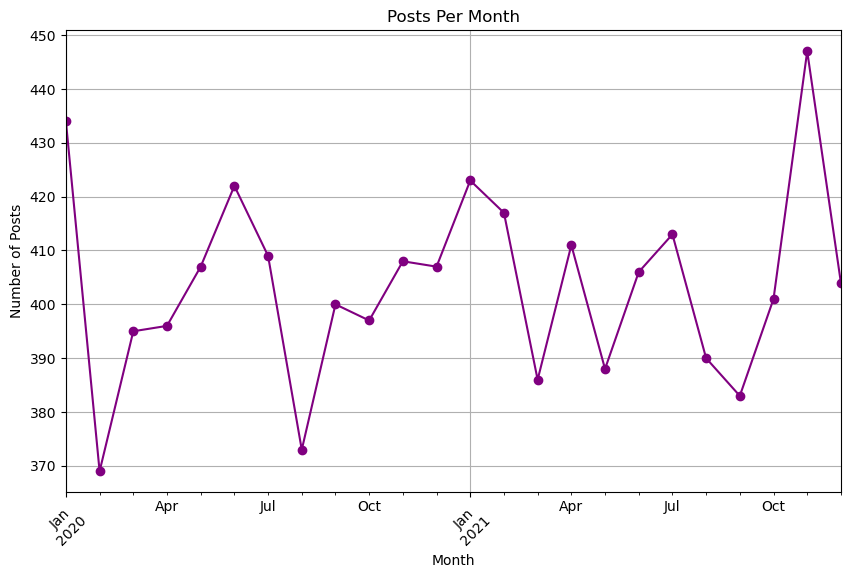

<Figure size 640x480 with 0 Axes>

In [187]:
# Plotting the line chart for posts per month
plt.figure(figsize=(10, 6))
monthly_posts.plot(kind='line', marker='o', color='purple')
plt.title('Posts Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>